In [1]:
import numpy as np
import birdwatcher as bw
from birdwatcher.plotting import imshow_frame
#from birdwatcher.frameprocessing import FrameIterator
#from birdwatcher.ffmpeg import arraytovideo
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
vf = bw.testvideosmall()

In [3]:
bgs = bw.BackgroundSubtractorMOG2(VarThreshold=70, NMixtures=8, History=3)

In [4]:
bgs.get_params()

{'History': 3,
 'ComplexityReductionThreshold': 0.05,
 'BackgroundRatio': 0.1,
 'NMixtures': 8,
 'VarInit': 15,
 'VarMin': 4,
 'VarMax': 75,
 'VarThreshold': 70,
 'VarThresholdGen': 9,
 'DetectShadows': False,
 'ShadowThreshold': 0.5,
 'ShadowValue': 127}

In [5]:
movementdector = bw.MovementDetector(bgsubtractor=bgs, learningrate=-1, ignore_firstnframes=0, 
                 focus_rectcoord=None, ignore_rectcoord=None, downscale=None, morphologyex=2)

In [7]:
coords = bw.create_coordarray('testcoords.darr', 
                              framewidth=vf.framewidth,
                              frameheight=vf.frameheight,
                              metadata={'bgsparams': bgs.get_params(),
                                        'movdetectparams': movementdector.get_params()},
                              overwrite=True)

In [8]:
for frame in vf.iter_frames():
    thresh, idx = movementdector.apply(frame)
    coords.append(idx)

In [9]:
coords.tovideo('zf20s_coords.mp4', framerate=vf.avgframerate)

Text(0, 0.5, 'number of pixels')

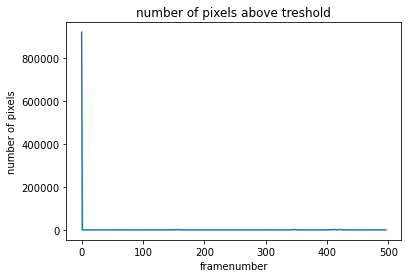

In [10]:
plt.plot(coords.get_coordcount())
plt.title('number of pixels above treshold')
plt.xlabel('framenumber')
plt.ylabel('number of pixels')

/home/gabriel/Dropbox/programs/birdwatcher/birdwatcher/coordinatearrays.py:81: RuntimeWarning: Mean of empty slice.
  return np.array([c.mean(0) for c in coordgen])
/home/gabriel/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:153: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


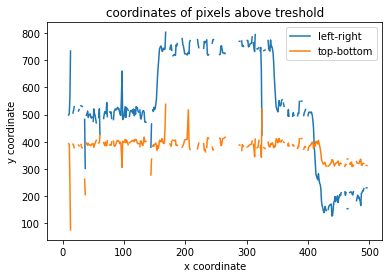

In [11]:
plt.plot(coords.get_coordmean())
plt.title('coordinates of pixels above treshold')
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.legend(['left-right', 'top-bottom'])

The situation for the raw coordinate data is more complex. You first index the frame you want, which returns an array of pixel coordinates. The number of pixels is variable.

In [11]:
cd_200 = cd[200]
print(cd_200)

NameError: name 'cd' is not defined

If you want to image the pixels, this can be done conveniently as so

In [12]:
%time frame = coords.get_frame(41)

CPU times: user 0 ns, sys: 2.07 ms, total: 2.07 ms
Wall time: 1.37 ms


(<Figure size 1008x1792 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3c6a32b580>)

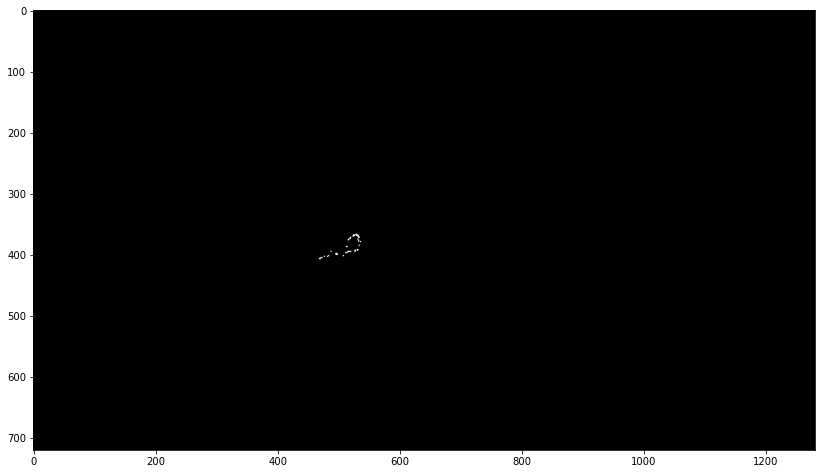

In [13]:
imshow_frame(frame)

let's look at the original frame

In [14]:
%time frame = vf.get_frame(41)

CPU times: user 0 ns, sys: 9.65 ms, total: 9.65 ms
Wall time: 158 ms


(<Figure size 1008x1792 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3c69a438b0>)

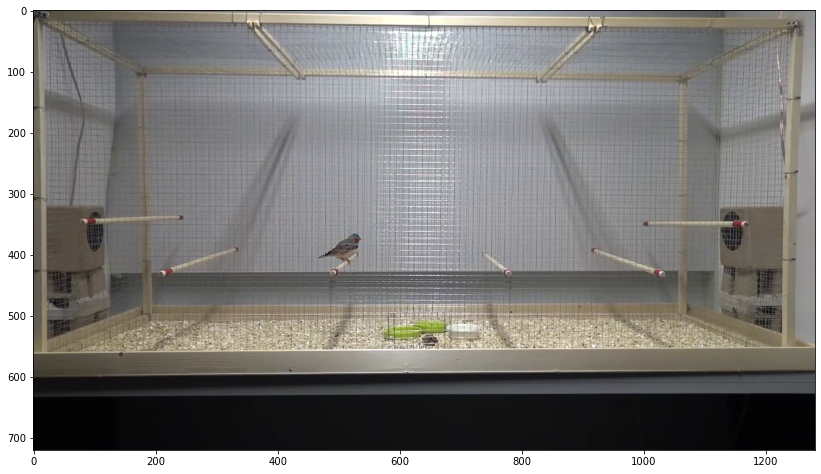

In [18]:
imshow_frame(frame)